In [1]:
import os,sys,string, time
from array import array
import matplotlib.pyplot as plt
import numpy as np
import uproot
import pandas as pd
from platform import python_version
import scipy
from scipy import stats
import uproot3
import math
from matplotlib.patches import Rectangle
from importlib import reload
import pickle

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Variables_list as Variables
import Utilities.Functions as Functions
import Utilities.Sys_unc_variables as Sys_unc
import Utilities.Variables_bins as Variables_bins
from Utilities.ipython_exit import exit

print ('Success')


Success


# Reading in .pkl files

In [2]:
Params = {"Run":"run3", #The run number, so far either "run1" or "run3"
          "Load_single_file":False, #This will override everything else, put the desired file in the "single_file" line
          "single_file":"overlay",
          "Load_standard_bkgs":True,
          "Load_DetVars":False,
          "Only_keep_common_DetVar_evs":True,
          "Load_Signal_DetVars":False,
          "Load_pi0_signal_DetVars":False,
          "Load_data":True,
          "FLATTEN":True, #Have one row per reconstructed object in the analysis dataframe
          "only_presel":False, #Create small files containing only variables necessary for pre-selection, for making pre-selection plots
          "Load_truth_vars":False,
          "Load_lepton_signal":True,
          "Load_lepton_dirac":False,
          "Load_pi0_signal":False,
          "Load_pi0_dirac":False}

# Params, samples = Functions.create_sample_list(Params)
Params, samples = Functions.new_create_sample_list(Params)
loc_pkls = "pkl_files/"+Params["Run"]+"/current_files/"+Params["variables_string"]+"/"
# end_string = "_FINAL"
end_string = "_full_Finished"

Loading these run3 samples: 
['overlay', 'dirtoverlay', 'beamoff', 'beamgood', '2_ee', '10_ee', '20_ee', '50_ee', '100_ee', '150_ee']


In [3]:
def Load_preselected_pkls(samples, Params, loc_pkls, filename):
    """
    For loading in preselected pkl files. 
    """
    sample_test_dict = {}
    sig_names_list = Constants.HNL_ee_samples_names+Constants.HNL_mass_pi0_samples_names+Constants.HNL_ee_dirac_names+Constants.HNL_pi0_dirac_names
    if Params["Load_DetVars"] == True: loc_pkls += "DetVars/"
    elif Params["Load_Signal_DetVars"] == True: loc_pkls += "Signal_DetVars/"
    elif Params['Load_pi0_signal_DetVars'] == True: loc_pkls += "Signal_DetVars/pi0/"
    for sample in samples:
        if Params["Load_pi0_signal"] == True: start_str = loc_pkls + "pi0_selection/Preselected_"
        # elif (sample == "beamoff") and (Params["EXT_in_training"] == True: start_str = loc_pkls + "BDT_Test_dfs/Test_overlay_"
        else: start_str = loc_pkls + "Preselected_"
        # sample_test_dict[sample] = pd.read_pickle(loc_pkls+f"Preselected_{sample}_"+Params["Run"]+f"_flattened{filename}.pkl")
        sample_test_dict[sample] = pd.read_pickle(start_str+f"{sample}_"+Params["Run"]+f"_flattened{filename}.pkl")
    
    return sample_test_dict

In [4]:
samples_dict = Load_preselected_pkls(samples, Params, loc_pkls, end_string)

In [5]:
samples_dict.keys()

dict_keys(['overlay', 'dirtoverlay', 'beamoff', 'beamgood', '2_ee', '10_ee', '20_ee', '50_ee', '100_ee', '150_ee'])

In [6]:
loc = "bdts/"
BDT_name = "_full_Finished_10"

with open(loc+f"input_vars/{BDT_name}_"+Params["Run"], "rb") as fp:   # Unpickling
    saved_variables = pickle.load(fp)

print(saved_variables)

converted_names = []
for var in saved_variables:
    converted_names.append(Constants.variable_names_dict[var])
    
print()
print(converted_names)

['n_pfps', 'n_tracks', 'shr_theta_v', 'shr_phi_v', 'shr_pz_v', 'shrclusdir2', 'shr_energy_tot', 'trk_theta_v', 'trk_phi_v', 'trk_dir_z_v', 'trk_energy', 'trk_energy_tot', 'trk_score_v', 'pfnplanehits_U', 'pfnplanehits_V', 'pfnplanehits_Y', 'NeutrinoEnergy2', 'shr_tkfit_dedx_max', 'topological_score', 'nu_flashmatch_score']

['Object multiplicity', 'Track multiplicity', 'Shower theta [radians]', 'Shower $\\phi$ [radians]', 'Shower z-momentum fraction', 'Shower cluster direction [degrees]', 'Total shower energy [GeV]', 'Track $\\theta$ [radians]', 'Track $\\phi$ [radians]', 'Track z-momentum fraction', 'Highest track energy [GeV]', 'Total track energy [GeV]', 'Track score', 'U plane hits', 'V plane hits', 'Y plane hits', 'Energy in slice [MeV]', 'Shower dEdx [MeV/cm]', 'Topological score', 'Flashmatch score']


In [7]:
# samples_dict = {}
# # end_string = "_FINAL"
# end_string = "_Finished"

# for sample in samples:
#     if sample in Constants.Detector_variations:
#         file = pd.read_pickle(loc_pkls+"DetVars/overlay_"+Params["Run"]+"_"+Params["variables_string"]+f"_{sample}_"+Params["Flat_state"]+"_"+Params["Reduced_state"]+"_final.pkl")
#         samples_dict[sample] = file
#     if Params["Load_Signal_DetVars"] == True:
#         file = pd.read_pickle(loc_pkls+"Signal_DetVars/"+Params["Run"]+f"_{sample}_"+Params["Reduced_state"]+f"{end_string}.pkl")
#         samples_dict[sample] = file
#     else:
#         if sample == 'signal':
#             for HNL_mass in Constants.HNL_mass_samples:
#                 file = pd.read_pickle(loc_pkls+f"Preselected_{HNL_mass}_"+Params["Run"]+"_my_vars_flattened_ultimate.pkl")
#                 # file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_New_gen.pkl")
#                 samples_dict[HNL_mass] = file
#         elif sample == 'pi0_signal':
#             for HNL_mass in Constants.HNL_mass_pi0_samples:
#                 file = pd.read_pickle(loc_pkls+f"pi0_selection/Preselected_"+Params["Run"]+f"_{HNL_mass}_pi0.pkl")
#                 # file = pd.read_pickle(loc_pkls+f"{sample}_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_New_gen.pkl")
#                 samples_dict[str(HNL_mass)+"_pi0"] = file
#         elif (Params["Load_single_file"] == True) and (isinstance(sample,int)):
#             HNL_mass = sample
#             file = pd.read_pickle(loc_pkls+f"signal_{HNL_mass}MeV_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_ultimate.pkl")
#             samples_dict[HNL_mass] = file
#         else: 
#             file = pd.read_pickle(loc_pkls+f"Preselected_{sample}_"+Params["Run"]+"_my_vars_flattened_ultimate.pkl")
#             # file = pd.read_pickle(loc_pkls+f"{sample}_"+Params["Run"]+"_"+Params["variables_string"]+"_"+Params["Flat_state"]+"_New_gen.pkl")
#             samples_dict[sample] = file

# print(samples_dict.keys())

In [7]:
for sample in samples_dict:
    print(f"{sample} length is " + str(len(samples_dict[sample])))

overlay length is 29905
dirtoverlay length is 3095
beamoff length is 12184
beamgood length is 11771
2_ee length is 18396
10_ee length is 15765
20_ee length is 17057
50_ee length is 15635
100_ee length is 15820
150_ee length is 15620


## Identifying individual events by rse_id

In [13]:
sample_test = "overlay"
# rse_id_test = "16219_10_513"
rse_id_test = "16333_24_1224"

# samples_dict[sample_test]['rse_id'][rse_id_test]
samples_dict[sample_test]['rse_id']

entry   subentry
20      0            17080_75_3779
48      0           17080_147_7374
135     2             17478_18_911
139     2             17478_18_920
156     1            17478_48_2409
                         ...      
748505  0           15231_152_7633
748614  0           15316_101_5094
748630  0           15316_192_9605
748646  0           16147_145_7261
748659  1           16147_176_8840
Name: rse_id, Length: 29905, dtype: object

# Make plotting dictionaries

In [9]:
#Want to have arrows drawn on for where the preselection cut goes
HNL_mass = 100
if Params["Load_pi0_signal"]: HNL_mass = f"{HNL_mass}_pi0" #only plotting one at a time
if Params["Load_lepton_signal"]: HNL_mass = f"{HNL_mass}_ee" #only plotting one at a time

samples_plotting = {"overlay":samples_dict["overlay"],
                    "dirtoverlay":samples_dict["dirtoverlay"],
                    "beamoff":samples_dict["beamoff"],
                    "signal":samples_dict[HNL_mass]}

if Params["Run"] == "run1":
    sample_norms = {"overlay":Constants.SF_overlay_run1,
                    "dirtoverlay":Constants.SF_dirt_run1,
                    "beamoff":Constants.SF_EXT_run1,
                    "signal":Constants.run1_POT_scaling_dict[HNL_mass]}
    flat_sys_vars_dict = Sys_unc.run1_Sys_unc
elif Params["Run"] == "run3":
    sample_norms = {"overlay":Constants.SF_overlay_run3,
                    "dirtoverlay":Constants.SF_dirt_run3,
                    "beamoff":Constants.SF_EXT_run3,
                    "signal":Constants.run3_POT_scaling_dict[HNL_mass]}
    flat_sys_vars_dict = Sys_unc.run3_Sys_unc

if Params["Load_data"] == True:
    data_dict = {"beamgood":samples_dict["beamgood"]}
    data_norm = {"beamgood":1.0} #No scaling as this is data, should have scaled MC to this POT.
    samples_plotting.update(data_dict)
    sample_norms.update(data_norm)
    
PT.HNL_scaling_calculator(samples_plotting,sample_norms)


The ratio of overlay to HNL events is 26359623

The ratio of all bkgs to HNL events is 42064214



## Plot data

In [10]:
samples_dict["overlay"].keys()

Index(['run', 'sub', 'evt', 'nslice', 'n_pfps', 'n_tracks', 'n_showers',
       'swtrig_pre', 'swtrig_post', 'trk_sce_start_x_v', 'trk_sce_start_y_v',
       'trk_sce_start_z_v', 'trk_sce_end_x_v', 'trk_sce_end_y_v',
       'trk_sce_end_z_v', 'shr_theta_v', 'shr_phi_v', 'shr_px_v', 'shr_py_v',
       'shr_pz_v', 'shrclusdir0', 'shrclusdir1', 'shrclusdir2',
       'shr_energy_tot', 'trk_theta_v', 'trk_phi_v', 'trk_dir_x_v',
       'trk_dir_y_v', 'trk_dir_z_v', 'trk_energy', 'trk_energy_hits_tot',
       'trk_energy_tot', 'trk_score_v', 'trk_calo_energy_u_v', 'trk_end_x_v',
       'trk_chipr_best', 'pfnplanehits_U', 'pfnplanehits_V', 'pfnplanehits_Y',
       'NeutrinoEnergy2', 'SliceCaloEnergy2', 'nu_flashmatch_score',
       'contained_sps_ratio', 'flash_time', 'contained_fraction', 'trk_score',
       'crtveto', 'shr_tkfit_dedx_U', 'shr_tkfit_dedx_V', 'shr_tkfit_dedx_Y',
       'shr_tkfit_dedx_max', 'shr_tkfit_2cm_dedx_Y', 'shr_chipr',
       'trk_bragg_p', 'trk_bragg_p_v', 'trk_chipr'

In [ ]:
New_feature_list = ['shrclusdir2', 'n_tracks', 'trk_energy', 'shr_theta_v', 'contained_sps_ratio', 'trk_chipr_best', 'shr_px_v',
                    'trk_end_x_v', 'n_pfps', 'pfnplanehits_V', 'pfnplanehits_U', 'trk_calo_energy_u_v', 'nu_flashmatch_score', 'trk_score_v',
                    'NeutrinoEnergy2', 'shr_phi_v', 'pfnplanehits_Y', 'shr_pz_v', 'trk_theta_v', 'trk_phi_v', 'trk_energy_hits_tot',
                    'trk_dir_z_v', 'SliceCaloEnergy2']
var_list_save = ['shrclusdir2', 'n_tracks', 'trk_energy',
       'shr_theta_v', 'contained_sps_ratio', 'trk_chipr_best', 'shr_px_v',
       'trk_end_x_v', 'n_pfps', 'pfnplanehits_V', 'pfnplanehits_U',
       'trk_calo_energy_u_v', 'nu_flashmatch_score', 'trk_score_v',
       'NeutrinoEnergy2', 'shr_phi_v', 'pfnplanehits_Y', 'shr_pz_v',
       'trk_theta_v', 'trk_phi_v', 'trk_energy_hits_tot', 'trk_dir_z_v',
       'SliceCaloEnergy2', 'trk_score', 'shr_energy_tot', 'trk_energy_tot', 'n_showers']
count = 0

print(Variables.other_potential_vars)


In [11]:
print(saved_variables)

['n_pfps', 'n_tracks', 'shr_theta_v', 'shr_phi_v', 'shr_pz_v', 'shrclusdir2', 'shr_energy_tot', 'trk_theta_v', 'trk_phi_v', 'trk_dir_z_v', 'trk_energy', 'trk_energy_tot', 'trk_score_v', 'pfnplanehits_U', 'pfnplanehits_V', 'pfnplanehits_Y', 'NeutrinoEnergy2', 'shr_tkfit_dedx_max', 'topological_score', 'nu_flashmatch_score']


In [59]:
#Calculate sys
# variable = var_list_save[count]
# count+=1

Calculate_sys = True
variable = 'shr_phi_v'


print("\'"+variable+"\'")

reload(PT)
reload(Functions)
reload(Constants)
reload(Sys_unc)
reload(Variables_bins)

if Params["Run"] == "run1": flat_sys_vars_dict = Sys_unc.run1_Sys_unc
if Params["Run"] == "run3": flat_sys_vars_dict = Sys_unc.run3_Sys_unc

print("Maximum value in overlay is " + str(max(samples_plotting["overlay"][variable].to_numpy())))    
print("Maximum value in signal is " + str(max(samples_plotting["signal"][variable].to_numpy()))) 
print("Manimum value in signal is " + str(min(samples_plotting["signal"][variable].to_numpy()))) 
samples_plotting.keys()

'shr_phi_v'
Maximum value in overlay is 3.141576
Maximum value in signal is 3.1406705
Manimum value in signal is -9999.0


dict_keys(['overlay', 'dirtoverlay', 'beamoff', 'signal', 'beamgood'])

Plotting shr_phi_v for run3
[-3.2  -2.88 -2.56 -2.24 -1.92 -1.6  -1.28 -0.96 -0.64 -0.32  0.    0.32
  0.64  0.96  1.28  1.6   1.92  2.24  2.56  2.88  3.2 ]
[-3.2, 3.2]


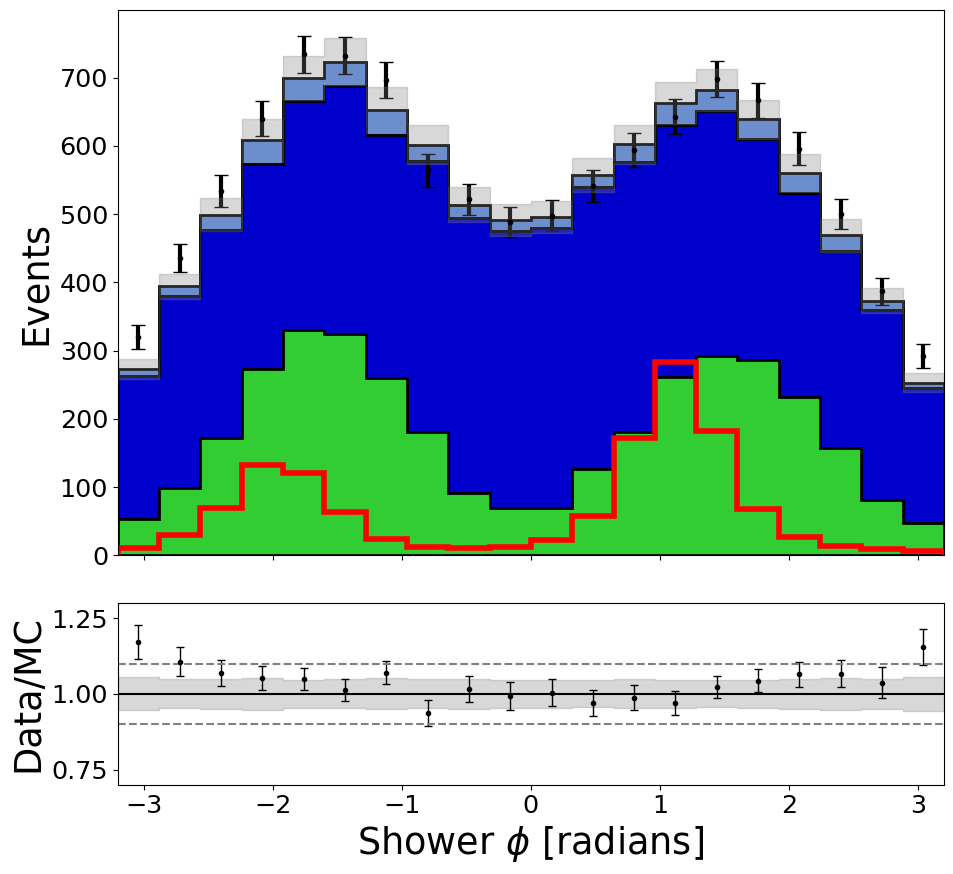

In [60]:
savefig = False

print(f"Plotting {variable} for " + Params["Run"])

if variable in Constants.variable_names_dict: xlabel = Constants.variable_names_dict[variable]
else: xlabel = variable

if variable in Variables_bins.BDT_vars_bins: bins = Variables_bins.BDT_vars_bins[variable]
else: bins = np.linspace(0, 10, 21)
xlims = [bins[0],bins[-1]]
print(bins)
print(xlims)

if Params["Run"]=="run1": Run = "Run 1"
if Params["Run"]=="run3": Run = "Run 3"

PT.Plot_preselection_variable_data(variable, samples_plotting, sample_norms, xlabel=xlabel, xlims=xlims, bins=bins, HNL_mass=100,
                                   HNLplotscale=5000000, cutline=[], legloc="best", show_ev_nums=False, CalcSys=Calculate_sys, logy=False, 
                                   xticks=[], sys_dict=flat_sys_vars_dict, centre_bins=False, hatch=False, ylabel="Events", 
                                   arrow_place=[], ylimit=None, legsize=None, dropdupes=False, err_print=False, Run=Run, chi_squared=False, 
                                   dirt_frac_error=0.75)

# if variable == "n_pfps":plt.xlim([0.5, 8.5])

# plt.axvline(x=16.5, lw=3, color='green', linestyle = 'dashed')
Name = ""
if Params["Load_pi0_signal"] == True: Name = "pi0/"
if Calculate_sys==True: Sys_name = "with_sys"
if Calculate_sys==False: Sys_name = "no_sys"

if savefig == True:
    plt.savefig(f"plots/Data_MC_comparison/BDT_input_variables/{Name}{variable}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}.png")
    plt.savefig(f"plots/Data_MC_comparison/BDT_input_variables/{Name}{variable}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}.pdf")

## Making legend-only plot

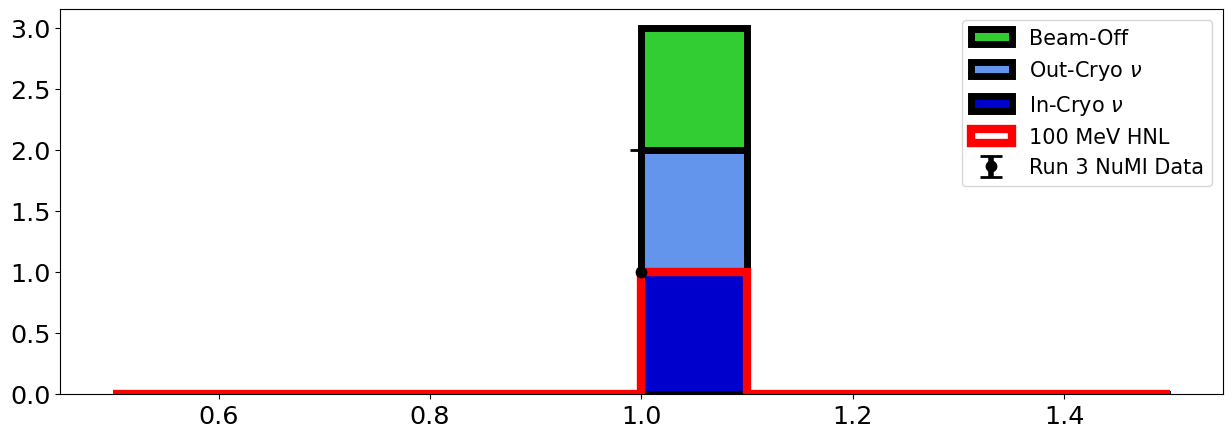

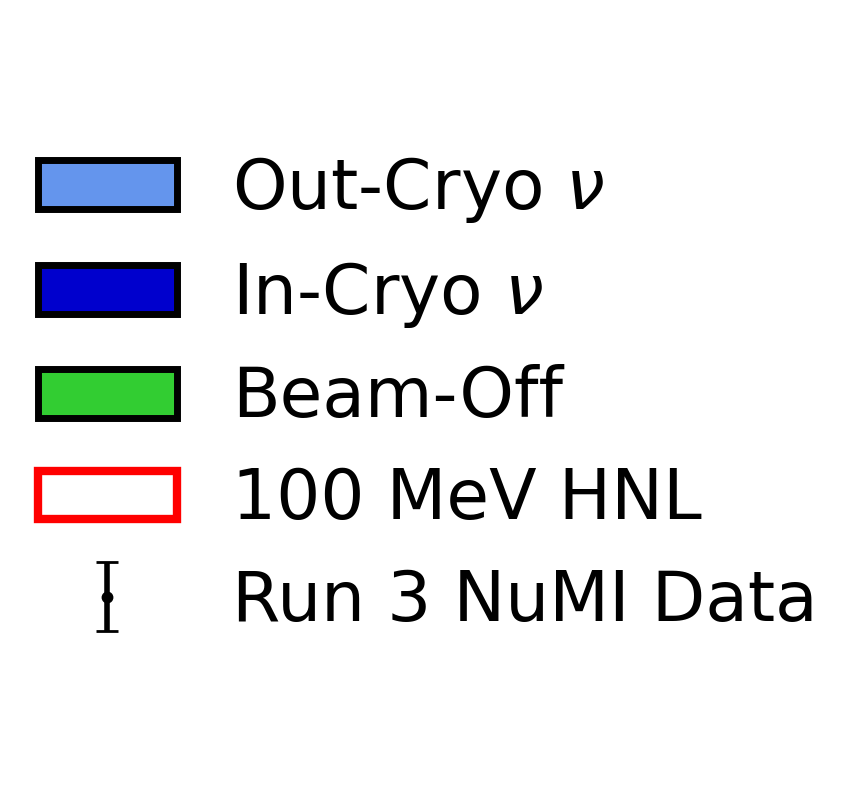

In [83]:
fig, ax = plt.subplots()
# colors=['sandybrown','seagreen',"darkgreen"]
data_label = f"{Run} NuMI Data"
# labels=[f"Beam-Off",fr"In-Cryo $\nu$",fr"Out-Cryo $\nu$"] 
ax.errorbar([1],[1],yerr=[1],fmt='.',color='black',lw=3,capsize=8, capthick=2,elinewidth=4, ms=15,label=data_label)
# plt.errorbar(bin_center,dat_val,yerr=dat_err,fmt='.',color='black',lw=5,capsize=5,elinewidth=3,label=data_label)
colours_sample = {'overlay':Constants.sample_colours['overlay'],
                  'dirtoverlay':Constants.sample_colours['dirtoverlay'],
                  'beamoff':Constants.sample_colours['beamoff'],
                  'signal':Constants.sample_colours['signal']}

HNL_mass_number = HNL_mass.split("_")[0]

HNL_label = f"{HNL_mass_number} MeV HNL"
labels_sample = {'overlay':fr"In-Cryo $\nu$",
                 'dirtoverlay':fr"Out-Cryo $\nu$",
                 'beamoff':f"Beam-Off",
                 'signal':HNL_label}

labels, colors = [], []
for sample in colours_sample:
    if sample == "signal": continue
    labels.append(labels_sample[sample])
    colors.append(colours_sample[sample])

ax.hist([[1],[1],[1]],histtype="stepfilled",stacked=True,linewidth=5,edgecolor="black", color=colors,label=labels)

plt.hist([1],label=[labels_sample["signal"]],color=colours_sample["signal"],lw=6,histtype="step")
ax.legend()
ax.legend(loc="best")


# get handles and labels for reuse
label_params = ax.get_legend_handles_labels() 
handles, labels=ax.get_legend_handles_labels() 
figl, axl = plt.subplots(figsize=[10,10])
axl.axis("Off")
order = [1, 2, 0, 3, 4]
#order = [3,0,2,1,4]
axl.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="center", bbox_to_anchor=(0.5, 0.5), prop={"size":50},frameon=False)

label_params = ax.get_legend_handles_labels() 
handles, labels=ax.get_legend_handles_labels()
order = [1, 2, 0, 3, 4]
axl.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="center", bbox_to_anchor=(0.5, 0.5), prop={"size":50},frameon=False)
# plt.text(-0.15,1.1,'MicroBooNE NuMI Data \n'+ r"POT:$5.01\times 10^{20}$ (RHC)",fontsize=50,color='black',alpha=1,verticalalignment='top',horizontalalignment='left',transform=plt.gca().transAxes)

figl.savefig("plots/Data_MC_comparison/Labels_fig.pdf")
figl.savefig("plots/Data_MC_comparison/Labels_fig.png")


## Make all BDT input plots (broken? don't know why)

In [ ]:
np.seterr(divide='ignore', invalid='ignore') # to stop annoying output about dividing by zeros or Nans
vars_to_plot = ['shrclusdir2', 'n_tracks', 'trk_energy', 'shr_theta_v', 'contained_sps_ratio', 'trk_chipr_best', 'shr_px_v',
                'trk_end_x_v', 'n_pfps', 'pfnplanehits_V', 'pfnplanehits_U', 'trk_calo_energy_u_v', 'nu_flashmatch_score', 'trk_score_v',
                'NeutrinoEnergy2', 'shr_phi_v', 'pfnplanehits_Y', 'shr_pz_v', 'trk_theta_v', 'trk_phi_v', 'trk_energy_hits_tot',
                'trk_dir_z_v', 'SliceCaloEnergy2', 'trk_energy_tot', 'shr_energy_tot', 'trk_calo_energy_u_v', 'trk_score_v', 'n_showers']

Calculate_sys = True
Name = ""
if Params["Load_pi0_signal"] == True: Name = "pi0/"
loc = f"plots/Data_MC_comparison/BDT_input_variables/"
if Calculate_sys==True: Sys_name = "with_sys"
#Need to add in savefig and savename in argument of plotting function, also make name better.
for var in vars_to_plot:
    print(var)
    savename = f"{Name}{var}_" + Params["Run"] + f"_{HNL_mass}MeV_{Sys_name}"
    xlabel = Constants.variable_names_dict[var]
    full_bins = Variables_bins.bins_var[var]
    bins = len(full_bins)-1
    xlims = [full_bins[0],full_bins[-1]]
    print(full_bins)
    PT.Plot_preselection_variable_data(variable, samples_plotting, sample_norms, xlabel=xlabel, xlims=xlims, bins=bins, HNL_mass=HNL_mass,
                                       HNLplotscale=2000000,cutline=0.0,legloc="best", show_ev_nums=False, CalcSys=Calculate_sys, xticks = [], 
                                       sys_dict=flat_sys_vars_dict, centre_bins=False, hatch=False, ylimit=None, legsize=22, logy=False, display=False,
                                       savefig=False, savename=loc+savename)
    

## Plotting just signal

In [ ]:
plt.figure(figsize=[10,10])

for HNL_mass in Constants.HNL_mass_samples:
    plt.plot(np.array(range(1, len(Efficiency_dict[effic])+1)),Efficiency_dict[HNL_mass],label=f"{HNL_mass} MeV HNL",lw=4,markersize=15)
    
plt.ylabel("Fraction Selected")
plt.xticks(np.array(range(1, len(Efficiency_dict[effic])+1)),["Full sample"]+list(Preselection_dict.keys()),rotation=80)
# plt.yscale("log")
plt.legend()

plt.savefig("plots/Preselection_efficiencies/Signal_only_"+Params["Run"]+"_"+Params["Flat_state"]+".png")

# End of code